Imports

In [2]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Import data

In [6]:
df = pd.read_csv("../data/hotels_summaries.csv")
df.head()

,hotel,place,price_per_night,rating,review_counter,price_cleaned,review_counter_cleaned,rating_cleaned,place_cleaned,description
0,Hard Rock Hotel Davos,Davos,€ 225,"8,4",1.653 Bewertungen,225.0,1653,8.4,Davos,The Hard Rock Hotel Davos has 1653 reviews on ...
1,Good Night Inn,Brig,€ 138,"8,2",2.669 Bewertungen,138.0,2669,8.2,Brig,"The Good Night Inn in Brig, Switzerland, has 2..."
2,Agriturismo Regusci,Camorino,€ 165,"8,7",765 Bewertungen,165.0,765,8.7,Camorino,The Agriturismo Regusci is located in Camorino...
3,Ustreia Orta,Lohn,€ 169,"9,6",52 Bewertungen,169.0,52,9.6,Lohn,Reviews on Booking.com give the hotel a rating...
4,Hotel Drei Könige,Einsiedeln,€ 177,"8,6",948 Bewertungen,177.0,948,8.6,Einsiedeln,The Hotel Drei Könige is located in Einsiedeln...


WordCloud Plot

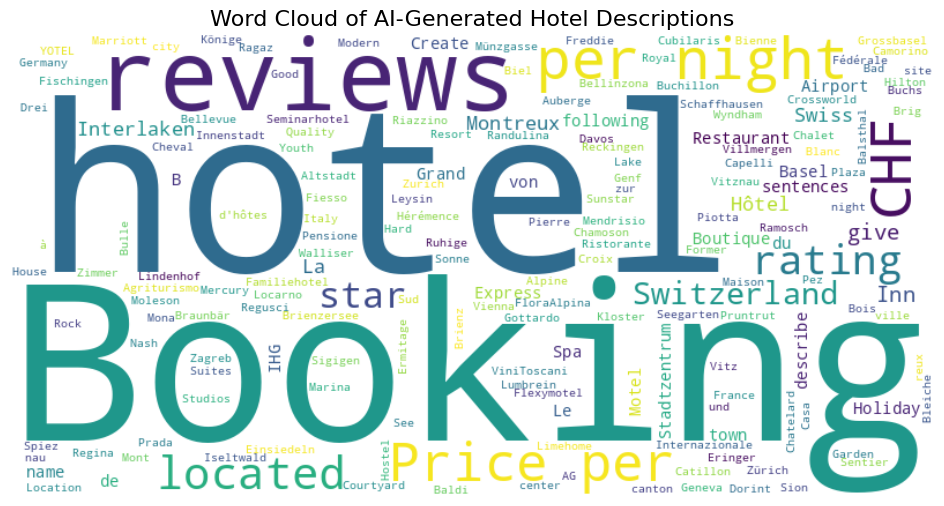

In [20]:
all_text = " ".join(df['description'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of AI-Generated Hotel Descriptions", fontsize=16)
# Save the figure BEFORE plt.show()
plt.savefig('../app/static/ai_generated_keywords.png', bbox_inches='tight')
plt.show()
plt.close()

Display DataFrame as a table

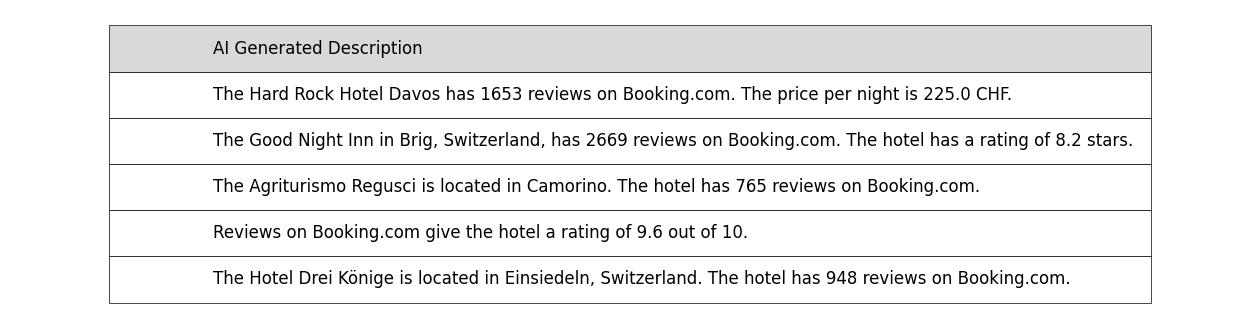

In [18]:
from IPython.display import display, HTML

df_display = df[['description']].copy()

# Limit rows if too many (optional)
df_display = df_display.head(5) 
df_display.columns = ['AI Generated Description']

# Create figure and axis
fig, ax = plt.subplots(figsize=(16, len(df_display) * 0.6 + 1))  # Dynamic height

# Turn off the axis
ax.axis('off')

# Create the table
table = ax.table(cellText=df_display.values,
                 colLabels=df_display.columns,
                 cellLoc='left',
                 colLoc='left',
                 loc='center')

# Styling
table.auto_set_font_size(False)
table.set_fontsize(12)
table.auto_set_column_width(col=list(range(len(df_display.columns))))

# Add table styling: grid lines, padding, borders
for (row, col), cell in table.get_celld().items():
    cell.set_edgecolor('black')
    cell.set_linewidth(0.5)
    cell.set_height(0.15)
    cell.set_text_props(ha='left', va='center', wrap=True)
    if row == 0:
        cell.set_facecolor('#d9d9d9')  # Header background

# Save the figure
plt.savefig('../app/static/hotel_descriptions_table.png', bbox_inches='tight', dpi=300)
plt.show()
plt.close()